In [2]:
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt

from tqdm.auto import tqdm

### A/A-тест, который сходится

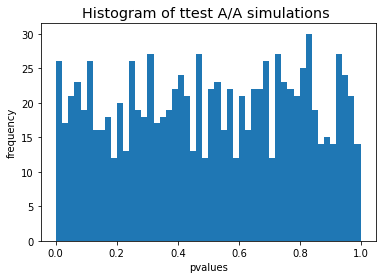

0.051

In [3]:
n = 100000
simulations = 1000
n_s = 1000
res = []

df = pd.DataFrame({
    "s1": np.random.exponential(scale=1/0.001, size=n),
    "s2": np.random.exponential(scale=1/0.001, size=n)
})

# Запуск симуляций A/A теста
for i in tqdm(range(simulations)):
    s1 = df['s1'].sample(n_s, replace = False).values
    s2 = df['s2'].sample(n_s, replace = False).values
    res.append(stats.ttest_ind(s1, s2, equal_var = False)[1]) # сохраняем pvalue

plt.hist(res, bins = 50)
plt.style.use('ggplot')
plt.xlabel('pvalues')
plt.ylabel('frequency')
plt.title("Histogram of ttest A/A simulations ")
plt.show()

# Проверяем, что количество ложноположительных случаев не превышает альфа
sum(np.array(res) <0.05) / simulations

### Второй случай, когда A/A-тест не сходится

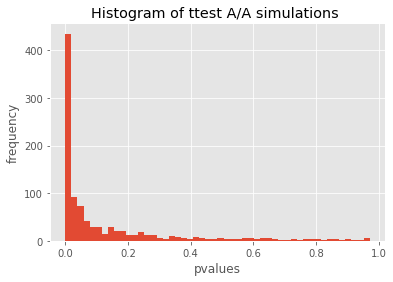

0.571

In [4]:
n = 100000
simulations = 1000
n_s = 1000
res = []

df = pd.DataFrame({
    "s1": np.random.exponential(scale=1/0.001, size=n),
    "s2": np.random.exponential(scale=1/0.001, size=n) * 1.1 # добавляем эффект 10%
})

for i in tqdm(range(simulations)):
    s1 = df['s1'].sample(n_s, replace = False).values
    s2 = df['s2'].sample(n_s, replace = False).values
    res.append(stats.ttest_ind(s1, s2, equal_var = False)[1])

plt.hist(res, bins = 50)
plt.style.use('ggplot')
plt.xlabel('pvalues')
plt.ylabel('frequency')
plt.title("Histogram of ttest A/A simulations ")
plt.show()

# FPR не сойдется
sum(np.array(res) <0.05) / simulations

# Homework:

In [6]:
dff = pd.read_csv('hw_aa.csv', sep=';')
dff

,Unnamed: 0,uid,experimentVariant,version,purchase
0,1,c4ca4238a0b923820dcc509a6f75849b,1,v2.8.0,0
1,2,c81e728d9d4c2f636f067f89cc14862c,0,v2.9.0,0
2,3,eccbc87e4b5ce2fe28308fd9f2a7baf3,1,v2.9.0,0
3,4,a87ff679a2f3e71d9181a67b7542122c,1,v2.8.0,0
4,5,e4da3b7fbbce2345d7772b0674a318d5,1,v2.8.0,0
...,...,...,...,...,...
127013,127014,d1f082ede77b17a99a9b0b240daf7bdf,0,v2.8.0,0
127014,127015,94f0d540830ccdc6b29c1938eea445cc,0,v2.8.0,0
127015,127016,709f74cf9721328e98be6f216e8a05a8,1,v2.9.0,0
127016,127017,1767ae3f8ffec269d9ed0ac0ede68d90,1,v2.8.0,0


In [7]:
dff = dff.drop(columns = 'Unnamed: 0')
dff.head()

,uid,experimentVariant,version,purchase
0,c4ca4238a0b923820dcc509a6f75849b,1,v2.8.0,0
1,c81e728d9d4c2f636f067f89cc14862c,0,v2.9.0,0
2,eccbc87e4b5ce2fe28308fd9f2a7baf3,1,v2.9.0,0
3,a87ff679a2f3e71d9181a67b7542122c,1,v2.8.0,0
4,e4da3b7fbbce2345d7772b0674a318d5,1,v2.8.0,0


In [8]:
dff.version.unique()

array(['v2.8.0', 'v2.9.0', 'v3.7.4.0', 'v3.8.0.0'], dtype=object)

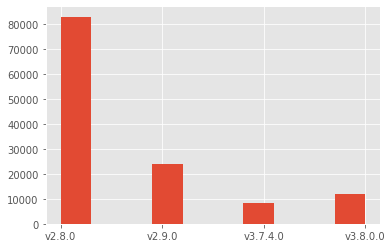

In [9]:
dff.version.hist()

In [10]:
v1 = dff[dff.experimentVariant == 1]
v0 = dff[dff.experimentVariant == 0]

In [11]:
v1

,uid,experimentVariant,version,purchase
0,c4ca4238a0b923820dcc509a6f75849b,1,v2.8.0,0
2,eccbc87e4b5ce2fe28308fd9f2a7baf3,1,v2.9.0,0
3,a87ff679a2f3e71d9181a67b7542122c,1,v2.8.0,0
4,e4da3b7fbbce2345d7772b0674a318d5,1,v2.8.0,0
5,1679091c5a880faf6fb5e6087eb1b2dc,1,v2.8.0,0
...,...,...,...,...
127009,4fb3ea6b8a7b9ebdc97abed972752225,1,v2.8.0,0
127010,bb179545e3bc08790c3c1a3221e1ce5c,1,v2.8.0,0
127015,709f74cf9721328e98be6f216e8a05a8,1,v2.9.0,0
127016,1767ae3f8ffec269d9ed0ac0ede68d90,1,v2.8.0,0


## A/A test:

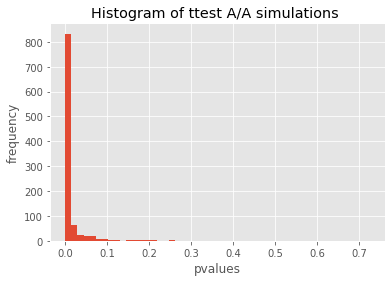

0.928

In [12]:
n = 100000
simulations = 1000
n_s = 1000
res = []

# Запуск симуляций A/A теста
for i in tqdm(range(simulations)):
    s1 = v0.purchase.sample(n_s, replace = False).values
    s2 = v1.purchase.sample(n_s, replace = False).values
    res.append(stats.ttest_ind(s1, s2, equal_var = False)[1]) # сохраняем pvalue

plt.hist(res, bins = 50)
plt.style.use('ggplot')
plt.xlabel('pvalues')
plt.ylabel('frequency')
plt.title("Histogram of ttest A/A simulations ")
plt.show()

# Проверяем, что количество ложноположительных случаев не превышает альфа
sum(np.array(res) <0.05) / simulations

## Ищем причину поломки:

In [31]:
grouped = dff.groupby(['version', 'experimentVariant'], as_index=False).agg({'purchase' : 'sum'})
grouped

,version,experimentVariant,purchase
0,v2.8.0,0,41
1,v2.8.0,1,1895
2,v2.9.0,0,890
3,v2.9.0,1,858
4,v3.7.4.0,0,252
5,v3.7.4.0,1,266
6,v3.8.0.0,0,328
7,v3.8.0.0,1,384


### В 2 вариантах эксперимента сильно отличается количество покупок в версии v2.8.0: 41 против 1895

In [18]:
total0 = v0.shape[0]
total0

63102

In [19]:
total1 = v1.shape[0]
total1

63916

In [32]:
grouped['cr'] = np.where(grouped['experimentVariant']==0, grouped.purchase / total0, grouped.purchase / total1)

In [33]:
grouped

,version,experimentVariant,purchase,cr
0,v2.8.0,0,41,0.000650
1,v2.8.0,1,1895,0.029648
2,v2.9.0,0,890,0.014104
3,v2.9.0,1,858,0.013424
4,v3.7.4.0,0,252,0.003994
5,v3.7.4.0,1,266,0.004162
6,v3.8.0.0,0,328,0.005198
7,v3.8.0.0,1,384,0.006008


In [34]:
stats.shapiro(v1.purchase)

/opt/tljh/user/lib/python3.7/site-packages/scipy/stats/morestats.py:1760: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


ShapiroResult(statistic=0.23318594694137573, pvalue=0.0)

### Тогда используем непараметрику:

In [37]:
stats.mannwhitneyu(v0[v0.version == 'v2.8.0'].purchase, v1[v1.version == 'v2.8.0'].purchase)

MannwhitneyuResult(statistic=819431781.5, pvalue=0.0)

In [38]:
stats.mannwhitneyu(v0[v0.version == 'v2.9.0'].purchase, v1[v1.version == 'v2.9.0'].purchase)

MannwhitneyuResult(statistic=71963272.5, pvalue=0.31829983470708123)

In [39]:
stats.mannwhitneyu(v0[v0.version == 'v3.7.4.0'].purchase, v1[v1.version == 'v3.7.4.0'].purchase)

MannwhitneyuResult(statistic=8845256.0, pvalue=0.5568648248217467)

In [40]:
stats.mannwhitneyu(v0[v0.version == 'v3.8.0.0'].purchase, v1[v1.version == 'v3.8.0.0'].purchase)

MannwhitneyuResult(statistic=17303962.0, pvalue=0.23185636638957852)

### Как и ожидалось, статзначимые различия оказались только у версии v2.8.0. Исключим ее из основного датафрейма

In [41]:
dff_upd = dff[dff.version != 'v2.8.0']

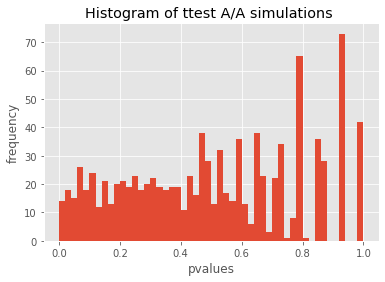

0.041

In [42]:
n = 100000
simulations = 1000
n_s = 1000
res = []

# Запуск симуляций A/A теста
for i in tqdm(range(simulations)):
    s1 = dff_upd[dff_upd.experimentVariant == 1].purchase.sample(n_s, replace = False).values
    s2 = dff_upd[dff_upd.experimentVariant == 0].purchase.sample(n_s, replace = False).values
    res.append(stats.ttest_ind(s1, s2, equal_var = False)[1]) # сохраняем pvalue

plt.hist(res, bins = 50)
plt.style.use('ggplot')
plt.xlabel('pvalues')
plt.ylabel('frequency')
plt.title("Histogram of ttest A/A simulations ")
plt.show()

# Проверяем, что количество ложноположительных случаев не превышает альфа
sum(np.array(res) <0.05) / simulations

### Теперь FPR < 0.05

**Вывод:** из-за неравномерного распределения покупок (конверсий) для одной из версий приложения А/А-тест давал сбой. После устранения этих данных из датасета А/А-тест проходит корректно. Остальные разбивки выполнены достаточно равномерно.